<a href="https://colab.research.google.com/github/luizadaquino/Trabalho-de-Data-Science-/blob/main/projeto_final_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
  import matplotlib.pyplot as plt

  wc_data = pd.read_csv("/content/sample_data/data.csv")
  wc_data

,match,dayofweek,match_time,home_team,away_team,home_xg,away_xg,score,attendance,venue,...,home_clearances,away_clearances,home_offsides,away_offsides,home_gks,away_gks,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls
0,1,Sun,2022-11-20 19:00:00,Qatar,Ecuador,0.3,1.2,0–2,67372.0,Al Bayt Stadium,...,18.0,7.0,3.0,4.0,4.0,7.0,20.0,17.0,51.0,70.0
1,2,Mon,2022-11-21 16:00:00,England,IR Iran,2.1,1.4,6–2,45334.0,Khalifa International Stadium,...,4.0,23.0,2.0,2.0,5.0,5.0,18.0,17.0,87.0,50.0
2,3,Mon,2022-11-21 19:00:00,Senegal,Netherlands,0.9,0.7,0–2,41721.0,Al Thumama Stadium,...,32.0,16.0,2.0,1.0,6.0,10.0,17.0,28.0,64.0,66.0
3,4,Mon,2022-11-21 22:00:00,United States,Wales,0.8,1.5,1–1,43418.0,Ahmed bin Ali Stadium,...,18.0,31.0,1.0,1.0,5.0,10.0,22.0,25.0,56.0,90.0
4,5,Tue,2022-11-22 13:00:00,Argentina,Saudi Arabia,2.2,0.1,1–2,88012.0,Lusail Iconic Stadium,...,11.0,26.0,10.0,1.0,3.0,9.0,24.0,13.0,55.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Fri,2022-12-09 22:00:00,Netherlands,Argentina,0.6,1.9,(3) 2–2 (4),88235.0,Lusail Iconic Stadium,...,17.0,20.0,1.0,2.0,9.0,9.0,29.0,19.0,93.0,57.0
58,59,Sat,2022-12-10 18:00:00,Morocco,Portugal,1.4,0.9,1–0,44198.0,Al Thumama Stadium,...,36.0,3.0,2.0,2.0,12.0,9.0,11.0,27.0,61.0,73.0
59,60,Sat,2022-12-10 22:00:00,England,France,2.4,0.9,1–2,68895.0,Al Bayt Stadium,...,13.0,16.0,1.0,2.0,9.0,5.0,16.0,14.0,61.0,62.0
60,61,Tue,2022-12-13 22:00:00,Argentina,Croatia,NaN,NaN,NaN,NaN,Lusail Iconic Stadium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1) Análise de passes completos x chutes no gol

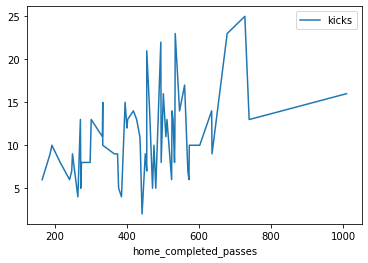

In [ ]:
passes_kicks = wc_data
df = pd.DataFrame(columns=["kicks"])
df["kicks"] = passes_kicks.set_index("home_completed_passes")["home_total_shots"]
df = df.sort_index()
df.plot()



### É possivel perceber uma leve correlação entre as duas variáveis. A partir do aumento do número de passes completos, ha uma maior ocorrência de chutes, mas nem todas partidas seguem essa relação. Umas partidas têm mais passes completos e menos chutes, outras mais chutes e menos passes. Não pode-se concluir que o número de passes têm relação direta com o numero de chutes, mas pode-se dizer que ha uma influência sim.

# 2) Análise defesas de um time vs numero de escanteios

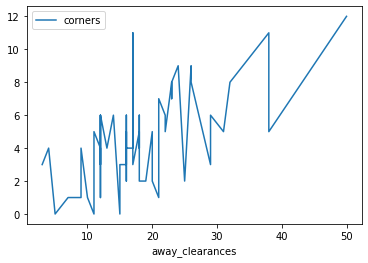

In [ ]:
df = pd.DataFrame(columns=["corners"])
df["corners"] = wc_data.set_index("away_clearances")["home_corners"]
df = df.sort_index()
df.plot()

### Neste gráfico, percebe-se uma relação entre o número de escanteios de um time com o numero de defesas do outro. Uma parte das defesas é responsável por causar escanteios, quando a bola sai pela linha de fundo, por isso, é possivel dizer que ha uma correlação.

# 3) Análise posse de bola x gols esperados

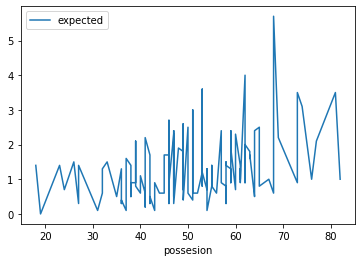

In [ ]:
df1 = pd.DataFrame(columns=["possesion", "expected"])
df1["possesion"] = wc_data["home_possession"]
df1["expected"] = wc_data["home_xg"]
df2 = pd.DataFrame(columns=["possesion", "expected"])
df2["possesion"] = wc_data["away_possession"]
df2["expected"] = wc_data["away_xg"]
df = df1.append(df2).reset_index()
df = df.set_index("possesion")
df = df.drop("index", axis=1)
df = df.sort_index()
df = df.dropna()
df.plot()

### Na análize do gráfico não é possível perceber muita correlação entre as variáveis no primeiro momento, pois não ha uma inclinação clara. Contudo, pode-se perceber que a maioria dos times que tiveram menor posse de bola (mais a esquerda), não tiveram altas espectativas de gol. Por outro lado, a parte da direita do gráfico, contendo os times que apresentaram maior posse de bola, apresenta times com as maiores espectativas de gol, como 3, 4 e 5 gols na partida. Com isso, pode-se dizer que, os times que apresentam maior espectativa de gol, consequentemente são os que apresentam maior posse de bola ao longo do jogo.

# 4) Análise chutes no gol x defesas

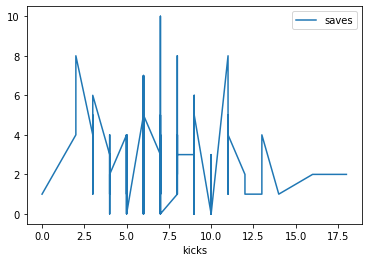

In [ ]:
df1 = pd.DataFrame(columns=["kicks", "saves"])
df1["kicks"] = wc_data["home_gks"]
df1["saves"] = wc_data["away_saves"]
df2 = pd.DataFrame(columns=["kicks", "saves"])
df2["kicks"] = wc_data["away_gks"]
df2["saves"] = wc_data["home_saves"]
df = df1.append(df2).reset_index()
df = df.set_index("kicks")
df = df.drop("index", axis=1)
df = df.sort_index()
df = df.dropna()
df.plot()

### Ná análise do gráfico apesar da representação acima não ser a mais apropriada, percebe-se que ha uma relação, pois toda vez que acontece um chute no gol, são três as váriaves possiveis,são elas: o gol, a defesa do goleiro e a saida de bola que indica o tiro de meta ou rebote, dentre essas váriaveis trabalhamos com 33,333% de que os lances no gol que sejam defesas do goleiro, não incluindo defesas de barreira, mas mesdmo excluindo as outras variáveis a relação chutes no gol e defesa do golero existem e são proporcionais. 